In [1]:
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from utils import train_classifier, plot_images
from datasets import load_nist_data
from architectures import LeNet5, ResNet18, ResNet34

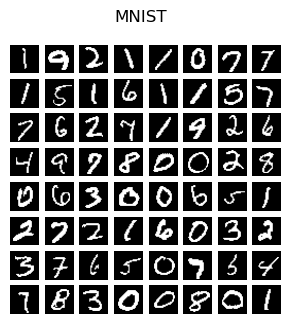

In [10]:
dataname = 'MNIST'
train_dataset = load_nist_data(dataset=dataname, binary_threshold=0.5, train=True)
test_dataset = load_nist_data(dataset=dataname, binary_threshold=0.5, train=False)

train_dataloader = DataLoader(train_dataset , batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_dataset , batch_size=64, shuffle=False)
images, _ = next(iter(train_dataloader))

plot_images(images, dataname, figsize=(3.5, 3.5))

#...train classifier

model = LeNet5(num_classes=10) 
train_classifier(model, 
                 train_dataloader, 
                 test_dataloader,
                 accuracy_goal=98.5,
                 save_as='model_{}_LeNet5.pth'.format('_'.join(dataname.split(' '))), 
                 epochs=100, 
                 lr=0.001)


In [ ]:
dataname = 'FashionMNIST'

train_dataset = load_nist_data(dataset=dataname, binary_threshold=None, train=True)
test_dataset = load_nist_data(dataset=dataname, binary_threshold=None, train=False)

train_dataloader = DataLoader(train_dataset , batch_size=128, shuffle=True)
test_dataloader = DataLoader(test_dataset , batch_size=64, shuffle=False)
images, _ = next(iter(train_dataloader))

plot_images(images, dataname, figsize=(3.5, 3.5))

#...train classifier

model =  ResNet34(num_classes=10) 
train_classifier(model, 
                 train_dataloader, 
                 test_dataloader,
                 accuracy_goal=95,
                 save_as='model_{}_ResNet34.pth'.format('_'.join(dataname.split(' '))), 
                 epochs=100, 
                 lr=0.001)

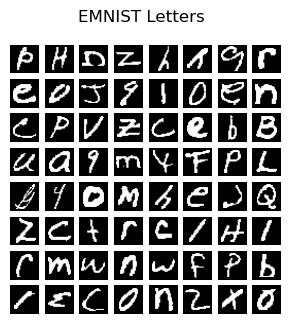

Epochs:   0%|          | 0/99 [00:00<?, ?it/s]

In [2]:
dataname = 'EMNIST Letters'
train_dataset = load_nist_data(dataset=dataname, binary_threshold=0.5, train=True)
test_dataset = load_nist_data(dataset=dataname, binary_threshold=0.5, train=False)

train_dataloader = DataLoader(train_dataset , batch_size=256, shuffle=True)
test_dataloader = DataLoader(test_dataset , batch_size=256, shuffle=False)
images, _ = next(iter(train_dataloader))

plot_images(images, dataname, figsize=(3.5, 3.5))

#...train classifier

model = ResNet18(num_classes=27) 
train_classifier(model, 
                 train_dataloader, 
                 test_dataloader,
                 accuracy_goal=95,
                 save_as='model_{}_ResNet18.pth'.format('_'.join(dataname.split(' '))), 
                 epochs=100, 
                 lr=0.001)

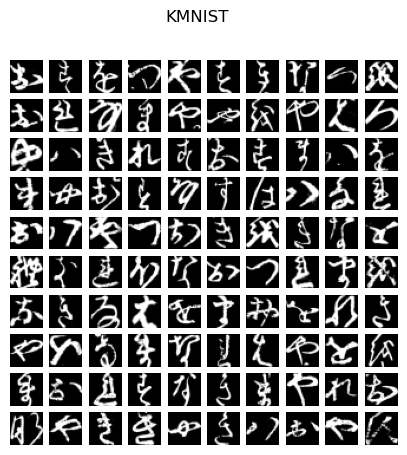

torch.Size([1, 28, 28])

In [74]:
data = 'KMNIST'
x = load_nist_data(dataset=data)
loader = DataLoader(x, batch_size=100, shuffle=True)
images, _ = next(iter(loader))
plot_images(images, data, figsize=(5, 5))
images[0].shape

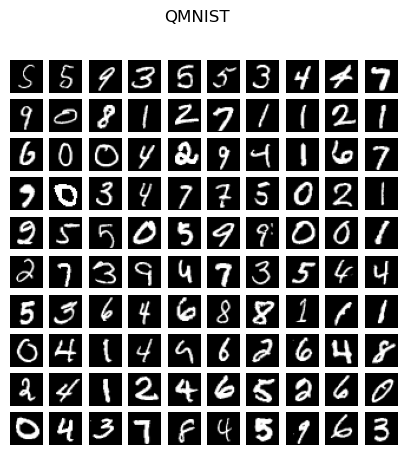

torch.Size([1, 28, 28])

In [73]:
data = 'QMNIST'
x = load_nist_data(dataset=data)
loader = DataLoader(x, batch_size=100, shuffle=True)
images, _ = next(iter(loader))
plot_images(images, data, figsize=(5, 5))
images[0].shape

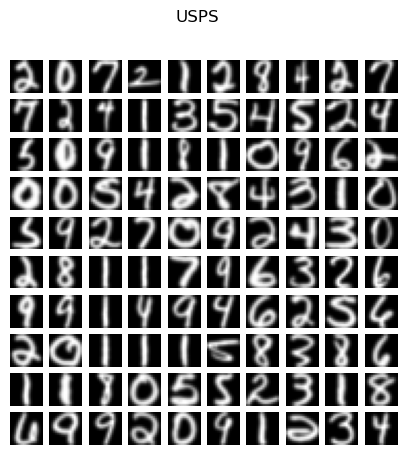

torch.Size([1, 16, 16])

In [69]:
data = 'USPS'
x = load_nist_data(dataset=data, binary_threshold=None)
loader = DataLoader(x, batch_size=100, shuffle=True)
images, _ = next(iter(loader))
plot_images(images, data, figsize=(5, 5))
images[0].shape

Files already downloaded and verified


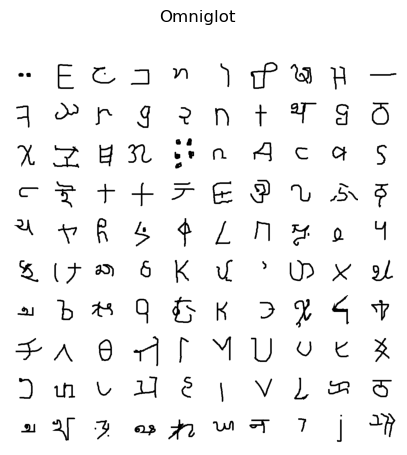

torch.Size([1, 105, 105])

In [71]:
data = 'Omniglot'
x = load_nist_data(dataset=data, binary_threshold=None)
loader = DataLoader(x, batch_size=100, shuffle=True)
images, _ = next(iter(loader))
plot_images(images, data, figsize=(5, 5))
images[0].shape

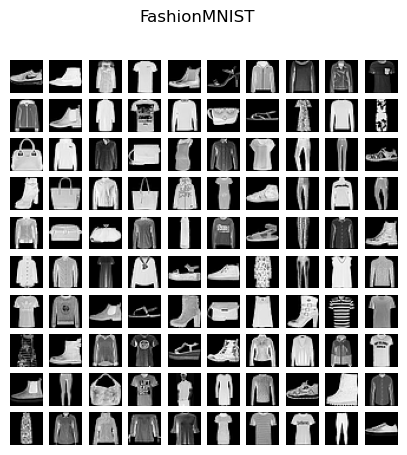

torch.Size([1, 28, 28])

In [72]:
data = 'FashionMNIST'
x = load_nist_data(dataset=data)
loader = DataLoader(x, batch_size=100, shuffle=True)
images, _ = next(iter(loader))
plot_images(images, data, figsize=(5, 5))
images[0].shape

## Reference Pepper MNIST sample 

We define the reference sample as binarized MNIST with threshold of 0.5 

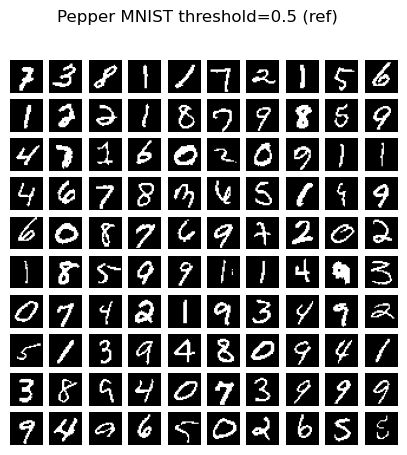

In [2]:
#...Retrieve 100 samples from training sample

from datasets import load_pepper_mnist

data_mnist_reference = load_pepper_mnist() 
loader_mnist_reference = DataLoader(data_mnist_reference, batch_size=100, shuffle=True)
images_mnist_reference, _ = next(iter(loader_mnist_reference))

plot_images(images_mnist_reference, "Pepper MNIST threshold=0.5 (ref)", figsize=(5, 5))

## Perturbed Pepper MNIST 

We now define the following perturbations of peppered MNIST:
- Pepper MNIST with binarizing thresholds different than 0.5 
- Gaussian noise 
- Gaussian Blurr
- Swirl deformation

We will later compute the FID between these datasets and the reference Pepper MNIST (binerized threshold=0.5) 

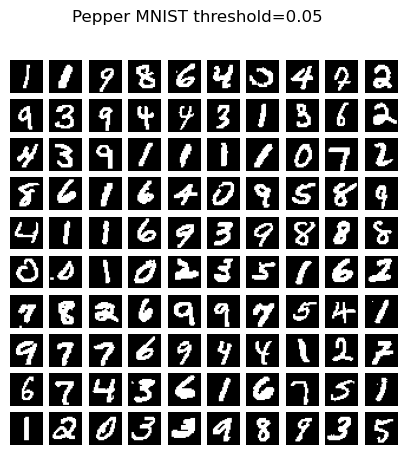

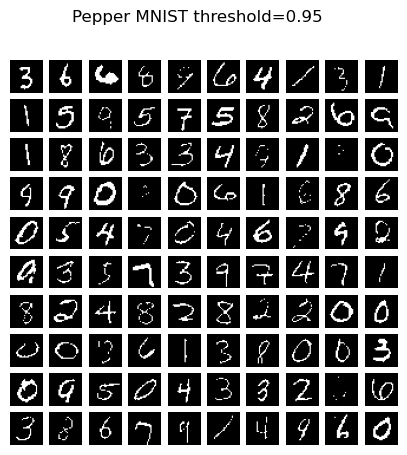

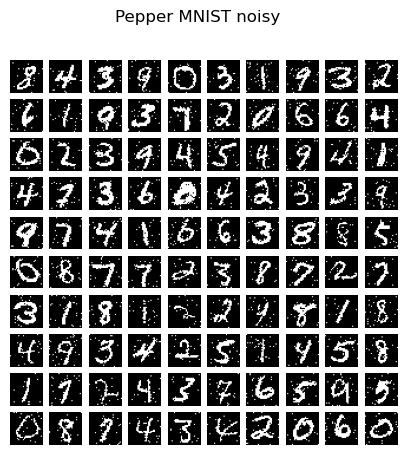

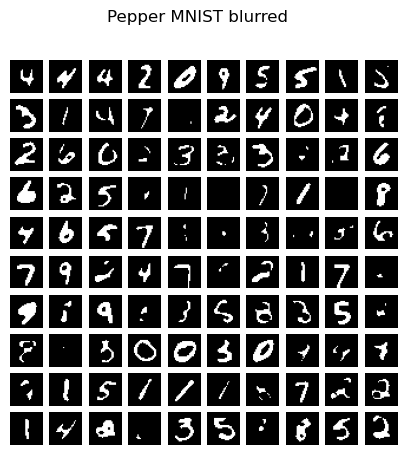

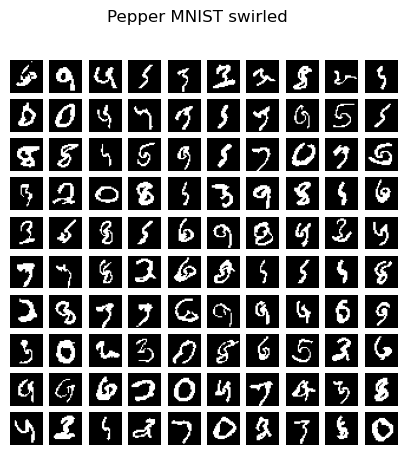

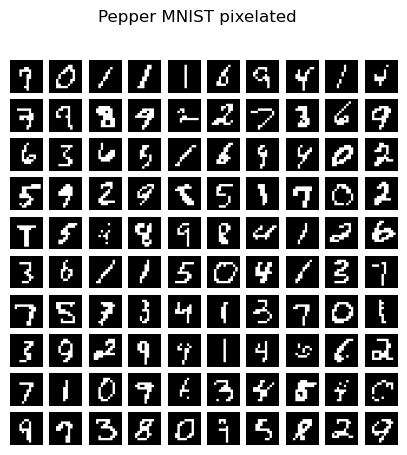

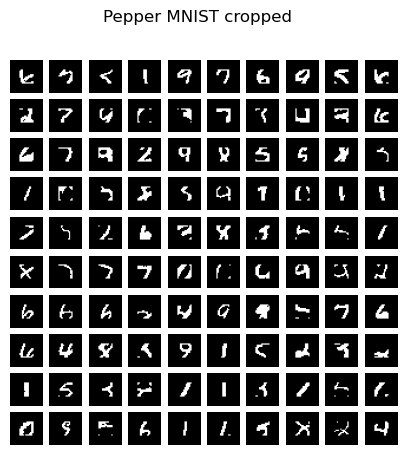

In [3]:
from datasets import load_noisy_pepper_mnist, load_blurred_pepper_mnist, load_swirled_pepper_mnist, load_pixelized_pepper_mnist, load_cropped_pepper_mnist

mnist_threshold_1 = load_pepper_mnist(threshold=0.05)  
loader_threshold_1  = DataLoader(mnist_threshold_1, batch_size=100, shuffle=True)
images_threshold_1 , _ = next(iter(loader_threshold_1))

mnist_threshold_2 = load_pepper_mnist(threshold=0.95)  
loader_threshold_2  = DataLoader(mnist_threshold_2, batch_size=100, shuffle=True)
images_threshold_2 , _ = next(iter(loader_threshold_2))

mnist_noise = load_noisy_pepper_mnist(sigma=0.25)  
loader_noise  = DataLoader(mnist_noise, batch_size=100, shuffle=True)
images_noise , _ = next(iter(loader_noise ))

mnist_blurred = load_blurred_pepper_mnist(kernel_size=7, sigma=1.5) 
loader_blurred  = DataLoader(mnist_blurred, batch_size=100, shuffle=True)
images_blurred , _ = next(iter(loader_blurred ))

mnist_swirl = load_swirled_pepper_mnist(strength=3, radius=20)  
loader_swirl = DataLoader(mnist_swirl, batch_size=100, shuffle=True)
images_swirl, _ = next(iter(loader_swirl))

mnist_pixel = load_pixelized_pepper_mnist(resolution=0.5)  
loader_pixel = DataLoader(mnist_pixel, batch_size=100, shuffle=True)
images_pixel, _ = next(iter(loader_pixel))

mnist_crop = load_cropped_pepper_mnist(crop_size=0.55)  
loader_crop = DataLoader(mnist_crop, batch_size=100, shuffle=True)
images_crop, _ = next(iter(loader_crop))

#...Plot the original and modified images
plot_images(images_threshold_1, "Pepper MNIST threshold=0.05", figsize=(5, 5))
plot_images(images_threshold_2, "Pepper MNIST threshold=0.95", figsize=(5, 5))
plot_images(images_noise, "Pepper MNIST noisy", figsize=(5, 5))
plot_images(images_blurred, "Pepper MNIST blurred", figsize=(5, 5))
plot_images(images_swirl, "Pepper MNIST swirled", figsize=(5, 5))
plot_images(images_pixel, "Pepper MNIST pixelated", figsize=(5, 5))
plot_images(images_crop, "Pepper MNIST cropped", figsize=(5, 5))

## Classifier for MNIST
We now train a classifier on the Reference Pepper MNIST data. This will be used later to compute the FID

In [3]:
import torch
import torch.nn as nn
import tqdm

from utils import train_classifier, LeNet5

epochs = 10
model = LeNet5() 
train_classifier(model, loader_mnist_reference, save_as='mnist_LeNet5.pth', epochs=10, lr=0.001)


Epochs: 100%|██████████| 9/9 [00:56<00:00,  6.30s/it]


We test the accuracy of the MNIST Classifier

In [4]:
import torch
from utils import get_accuracy_confusion_matrix
from utils import LeNet5

model = LeNet5()
model.load_state_dict(torch.load('mnist_LeNet5.pth'))
model.eval()

# Load MNIST test dataset

test_dataset_ref = load_pepper_mnist(0.5, train=False)
test_loader_ref = DataLoader(test_dataset_ref, batch_size=1000, shuffle=False)

# Test the model

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
get_accuracy_confusion_matrix(model, device, test_loader_ref)


Test set: Average loss: 0.0362, Accuracy: 9887/10000 (99%)

Confusion Matrix:
 [[ 976    1    0    0    0    0    0    3    0    0]
 [   0 1129    0    1    1    0    1    2    0    1]
 [   1    0 1021    0    1    0    0    8    1    0]
 [   0    0    4  996    0    0    0    2    3    5]
 [   0    0    1    0  975    0    1    0    1    4]
 [   1    1    0    9    0  873    1    1    2    4]
 [   5    2    0    0    1    1  948    0    1    0]
 [   0    2    2    0    0    0    0 1021    1    2]
 [   3    0    4    2    1    1    0    5  955    3]
 [   0    1    0    1    9    0    0    3    2  993]]


## FID computations

### 1. Binarizing Threshold

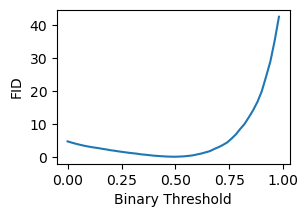

In [5]:
import numpy as np
from fid import perturbed_MNIST_fid

fid = perturbed_MNIST_fid(model, perturbation='threshold', values=np.arange(0.0, 1, 0.02), layer='fc1')

fig, ax = plt.subplots(1,1, figsize=(3,2))
plt.plot(fid.keys(), fid.values())
plt.ylabel('FID')
plt.xlabel('Binary Threshold')
plt.show()

### 2. Gaussian noise

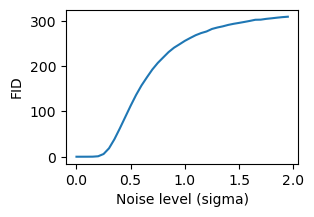

In [11]:
import numpy as np
from fid import perturbed_MNIST_fid

fid = perturbed_MNIST_fid(model, perturbation='noise', values=np.arange(0.0, 2, 0.05))

fig, ax = plt.subplots(1,1, figsize=(3,2))
plt.plot(fid.keys(), fid.values())
plt.ylabel('FID')
plt.xlabel('Noise level (sigma)')
plt.show()

### 3. Gaussian blur

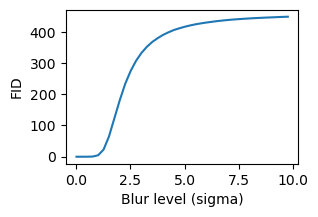

In [7]:
import numpy as np
from fid import perturbed_MNIST_fid

fid = perturbed_MNIST_fid(model, perturbation='blur', values=np.arange(0.01, 10, 0.25))

fig, ax = plt.subplots(1,1, figsize=(3,2))
plt.plot(fid.keys(), fid.values())
plt.ylabel('FID')
plt.xlabel('Blur level (sigma)')
plt.show()

### 4. Swirl deformation

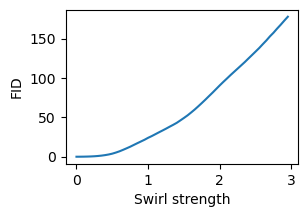

In [7]:
import numpy as np
from fid import perturbed_MNIST_fid

fid = perturbed_MNIST_fid(model, perturbation='swirl', values=np.arange(0, 3, 0.05))

fig, ax = plt.subplots(1,1, figsize=(3,2))
plt.plot(fid.keys(), fid.values())
plt.ylabel('FID')
plt.xlabel('Swirl strength')
plt.show()

### 5. Pixelization

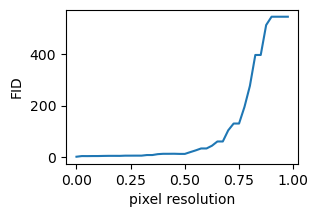

In [5]:
import numpy as np
from fid import perturbed_MNIST_fid

fid = perturbed_MNIST_fid(model, perturbation='pixelate', values=np.arange(0, 1, 0.025))

fig, ax = plt.subplots(1,1, figsize=(3,2))
plt.plot(fid.keys(), fid.values())
plt.ylabel('FID')
plt.xlabel('pixel resolution')
plt.show()

### 6. Crop image

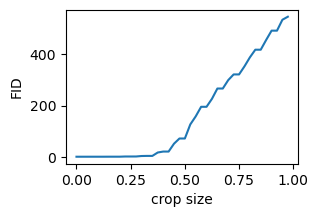

In [7]:
import numpy as np
from fid import perturbed_MNIST_fid

fid = perturbed_MNIST_fid(model, perturbation='crop', values=np.arange(0, 1, 0.025))

fig, ax = plt.subplots(1,1, figsize=(3,2))
plt.plot(fid.keys(), fid.values())
plt.ylabel('FID')
plt.xlabel('crop size')
plt.show()